<a href="https://colab.research.google.com/github/Gramz10/PortfolioProjects/blob/main/User_compares_housing_data_by_Zip_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=17YCvtfJwHfujpAm7OkgiHzPedgx3alWR')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,843016.0,...,1948950.0,1959393.0,1968185.0,1983958.0,2002629.0,2023242.0,2045921.0,2059887.0,2065529.0,2063020.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,370874.0,...,641585.0,645938.0,649394.0,651825.0,652146.0,655854.0,658997.0,665569.0,670335.0,673178.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1627388.0,...,3115482.0,3135955.0,3162244.0,3175944.0,3183167.0,3201223.0,3249641.0,3302311.0,3324001.0,3331785.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,164127.0,...,325559.0,331314.0,336172.0,340954.0,348051.0,356753.0,367285.0,375885.0,381273.0,382841.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,446151.0,...,747531.0,753338.0,756832.0,759335.0,759078.0,762861.0,765671.0,772334.0,777664.0,781433.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23390 entries, 0 to 23389
Columns: 280 entries, RegionID to 2022-07-31
dtypes: float64(271), int64(3), object(6)
memory usage: 50.0+ MB


In [4]:
df.shape


(23390, 280)

In [5]:
df.isnull().sum().sort_values()

RegionID          0
SizeRank          0
RegionName        0
RegionType        0
StateName         0
              ...  
2000-05-31    11624
2000-04-30    11668
2000-03-31    11685
2000-02-29    11706
2000-01-31    11789
Length: 280, dtype: int64

In [7]:
df = df.rename(columns= {'RegionName':'Zipcode'})
df

,RegionID,SizeRank,Zipcode,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,843016.0,...,1948950.0,1959393.0,1968185.0,1983958.0,2002629.0,2023242.0,2045921.0,2059887.0,2065529.0,2063020.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,370874.0,...,641585.0,645938.0,649394.0,651825.0,652146.0,655854.0,658997.0,665569.0,670335.0,673178.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1627388.0,...,3115482.0,3135955.0,3162244.0,3175944.0,3183167.0,3201223.0,3249641.0,3302311.0,3324001.0,3331785.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,164127.0,...,325559.0,331314.0,336172.0,340954.0,348051.0,356753.0,367285.0,375885.0,381273.0,382841.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,446151.0,...,747531.0,753338.0,756832.0,759335.0,759078.0,762861.0,765671.0,772334.0,777664.0,781433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23385,99547,34322,98068,Zip,WA,WA,Snoqualmie Pass,Ellensburg,Kittitas County,NaN,...,751746.0,779296.0,797926.0,812942.0,822868.0,844258.0,876785.0,911684.0,944626.0,970874.0
23386,93733,34322,81225,Zip,CO,CO,Mount Crested Butte,NaN,Gunnison County,353599.0,...,699056.0,707203.0,722397.0,733604.0,741966.0,742007.0,745301.0,750988.0,764798.0,778511.0
23387,98152,34322,95375,Zip,CA,CA,Strawberry,Sonora,Tuolumne County,NaN,...,426056.0,421748.0,418881.0,418710.0,429385.0,438033.0,447110.0,453889.0,457169.0,457778.0
23388,75924,34322,41101,Zip,KY,KY,Ashland,Huntington-Ashland,Boyd County,61665.0,...,99835.0,100554.0,102301.0,103987.0,105719.0,106268.0,106877.0,107505.0,108404.0,109289.0


In [8]:
df = df.drop(columns=['RegionType', 'RegionID'])

In [9]:
print('Please enter the zipcode you would like to use for time series analysis:  ')

Please enter the zipcode you would like to use for time series analysis:  


In [10]:
zipcode1 = int(input())

94560


In [11]:
print('Would you like to compare it with another zipcode? Y or N? ')

Would you like to compare it with another zipcode? Y or N? 


In [12]:
answer = input().upper()

y


In [13]:
if answer.upper == 'Y' or 'y':
  print('Enter the 2nd zipcode you would like to use: ')
  zipcode2 = int(input())

else:
  print('Great now lets move on with the analysis of ' + str(zipcode1))

Enter the 2nd zipcode you would like to use: 
94303


In [14]:
#selected_zipcodes = np.logical_or(df['Zipcode'] == int(zipcode1), df['Zipcode'] == int(zipcode2))
zipcode1_bool = df['Zipcode'] == zipcode1

zipcode2_bool = df['Zipcode'] == zipcode2

In [15]:
#df[(df['Zipcode'] == zipcode1) | (df['Zipcode'] == zipcode2)]
df[zipcode2_bool]

,SizeRank,Zipcode,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
2291,2315,94303,CA,CA,Palo Alto,San Jose-Sunnyvale-Santa Clara,Santa Clara County,438732.0,441500.0,444878.0,...,1887112.0,1908887.0,1941348.0,1976762.0,2013567.0,2047874.0,2072484.0,2083195.0,2067375.0,2021032.0


In [16]:
zip1_df = df[zipcode1_bool]
zip2_df = df[zipcode2_bool]

In [17]:
zip1_df.set_index('City')
zip2_df.set_index('City')


,SizeRank,Zipcode,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
City,,,,,,,,,,,,,,,,,,,,,
Palo Alto,2315,94303,CA,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,438732.0,441500.0,444878.0,454527.0,...,1887112.0,1908887.0,1941348.0,1976762.0,2013567.0,2047874.0,2072484.0,2083195.0,2067375.0,2021032.0


In [18]:
new_df = pd.concat([zip1_df,zip2_df], axis=0)
print(new_df)

      SizeRank  Zipcode StateName State       City  \
2067      2092    94560        CA    CA     Newark   
2291      2315    94303        CA    CA  Palo Alto   

                               Metro          CountyName  2000-01-31  \
2067   San Francisco-Oakland-Hayward      Alameda County    286072.0   
2291  San Jose-Sunnyvale-Santa Clara  Santa Clara County    438732.0   

      2000-02-29  2000-03-31  ...  2021-10-31  2021-11-30  2021-12-31  \
2067    287302.0    289909.0  ...   1126337.0   1137833.0   1153492.0   
2291    441500.0    444878.0  ...   1887112.0   1908887.0   1941348.0   

      2022-01-31  2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  \
2067   1176325.0   1202658.0   1237038.0   1267185.0   1285443.0   1282171.0   
2291   1976762.0   2013567.0   2047874.0   2072484.0   2083195.0   2067375.0   

      2022-07-31  
2067   1268815.0  
2291   2021032.0  

[2 rows x 278 columns]


In [19]:
new_df.head()

,SizeRank,Zipcode,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
2067,2092,94560,CA,CA,Newark,San Francisco-Oakland-Hayward,Alameda County,286072.0,287302.0,289909.0,...,1126337.0,1137833.0,1153492.0,1176325.0,1202658.0,1237038.0,1267185.0,1285443.0,1282171.0,1268815.0
2291,2315,94303,CA,CA,Palo Alto,San Jose-Sunnyvale-Santa Clara,Santa Clara County,438732.0,441500.0,444878.0,...,1887112.0,1908887.0,1941348.0,1976762.0,2013567.0,2047874.0,2072484.0,2083195.0,2067375.0,2021032.0


In [20]:
new_df = new_df.set_index('City')

In [21]:
valuations = new_df.iloc[:, 7:]
valuations

,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
City,,,,,,,,,,,,,,,,,,,,,
Newark,287302.0,289909.0,299201.0,311656.0,321025.0,328165.0,332606.0,340477.0,346807.0,353509.0,...,1126337.0,1137833.0,1153492.0,1176325.0,1202658.0,1237038.0,1267185.0,1285443.0,1282171.0,1268815.0
Palo Alto,441500.0,444878.0,454527.0,465141.0,480166.0,492928.0,507280.0,517312.0,527295.0,537397.0,...,1887112.0,1908887.0,1941348.0,1976762.0,2013567.0,2047874.0,2072484.0,2083195.0,2067375.0,2021032.0


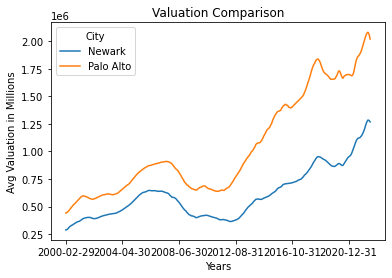

In [22]:
valuations.T.plot()
plt.title('Valuation Comparison')
plt.xlabel('Years')
plt.ylabel('Avg Valuation in Millions')
plt.show()

Sources used:
https://towardsdatascience.com/23-efficient-ways-of-subsetting-a-pandas-dataframe-6264b8000a77

https://stackoverflow.com/questions/54315627/difference-between-and-and-in-pandas

https://stackoverflow.com/questions/63667387/plotly-how-to-plot-a-line-chart-from-two-rows-of-data

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html#pandas.DataFrame.set_index

https://stackoverflow.com/questions/41747039/how-to-plot-rows-in-dataframe